<a href="https://colab.research.google.com/github/julioreis-dev/data_science/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports and packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# **Exemple 1**
# f(x) = $x^2 + x + 1$

In [3]:
def f1(x):
  return x**2 + x + 1

In [4]:
f = lambda x: x**2 + x + 1

In [5]:
# Make data with numpy
x_1 = np.linspace(start=-3, stop=3, num=100)

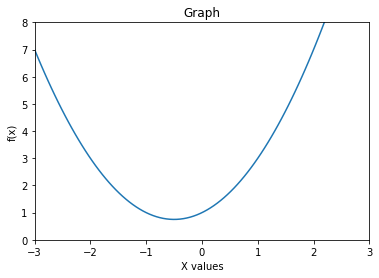

In [6]:
# Plot the graph
plt.plot(x_1, f(x_1))
plt.title('Graph')
plt.xlabel('X values')
plt.ylabel('f(x)')
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.show()

# **Derivative**

In [7]:
df = lambda x: 2*x + 1

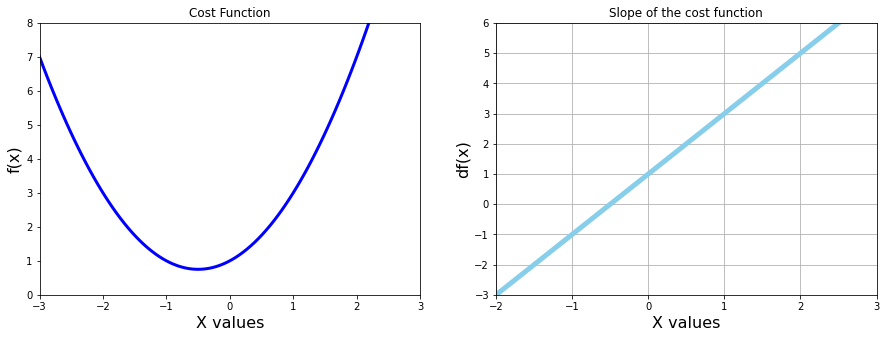

In [8]:
plt.figure(figsize=(15, 5))

# 1 charts: Cost function
plt.subplot(1, 2, 1)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)
plt.title('Cost Function')
plt.xlabel('X values', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.xlim(-3, 3)
plt.ylim(0, 8)

# 2 charts: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function')
plt.xlabel('X values', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)
plt.grid()

plt.show()

# **Gradient Descent**

In [9]:
new_x = 3
previus_x = 0
step_multiplier = 0.1
x_list = []
for n in range(30):
  previus_x = new_x
  gradient = df(previus_x)
  new_x = previus_x - step_multiplier * gradient  
  x_list.append(new_x)
  
print(f'Local minimum: {new_x}')
print(f'Slope or df(x)value at this point is: {df(new_x)}')
print(f'f(x) value or cost at this point is: {f(new_x)}')

Local minimum: -0.4956672098625011
Slope or df(x)value at this point is: 0.008665580274997753
f(x) value or cost at this point is: 0.7500187730703756


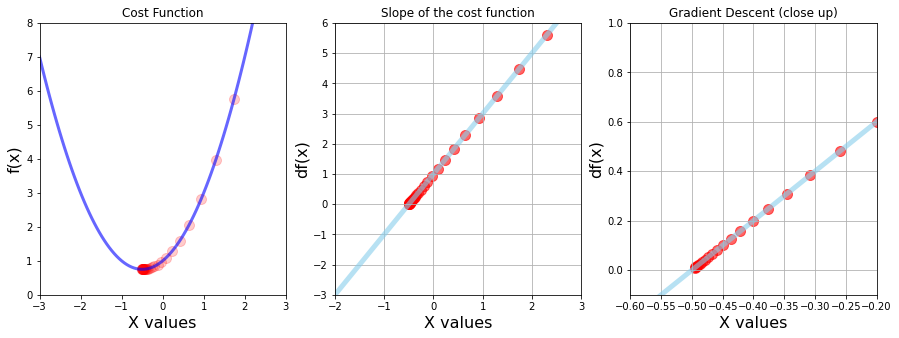

In [10]:
plt.figure(figsize=(15, 5))

# 1 charts: Cost function
plt.subplot(1, 3, 1)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.6)
plt.title('Cost Function')
plt.xlabel('X values', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.xlim(-3, 3)
plt.ylim(0, 8)
values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.2)

# 2 charts: Derivative
plt.subplot(1, 3, 2)
plt.title('Slope of the cost function')
plt.xlabel('X values', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(values, df(values), color='red', s=100, alpha=0.6)
plt.grid()

# 3 charts: Derivative (Close up)
plt.subplot(1, 3, 3)
plt.title('Gradient Descent (close up)')
plt.xlabel('X values', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim(-0.6, -0.2)
plt.ylim(-0.1, 1)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(values, df(values), color='red', s=100, alpha=0.6)
plt.grid()

plt.show()

# **Example 2 - Multiple minima vs Initial guess & advanced functions
$$g(x) = x^4 - 4x^2 + 5$$

In [11]:
g = lambda x: x**4 - 4*x**2 + 5

In [12]:
dg = lambda x: 4*x**3 - 8*x

In [13]:
x_2 = np.linspace(-2, 2, 1000)

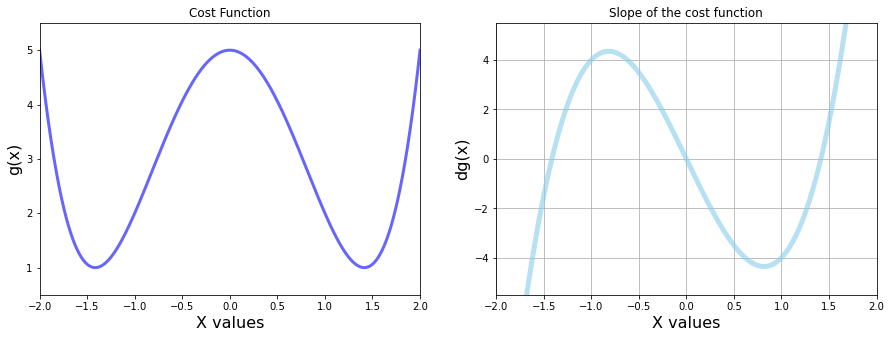

In [14]:
plt.figure(figsize=(15, 5))

# 1 charts: Cost function
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.6)
plt.title('Cost Function')
plt.xlabel('X values', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
# plt.scatter(x_2, g(x_2), color='red', s=100, alpha=0.2)

# 2 charts: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function')
plt.xlabel('X values', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.xlim(-2, 2)
plt.ylim(-5.5, 5.5)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
# plt.scatter(x_2, dg(x_2), color='red', s=100, alpha=0.6)
plt.grid()

plt.show()

In [31]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001):
  new_x = initial_guess
  x_list = [new_x]
  slope_list = [derivative_func(new_x)]  
  for n in range(500):
    previus_x = new_x
    gradient = derivative_func(previus_x)
    new_x = previus_x - multiplier * gradient
    
    step_size = abs(new_x - previus_x)
    x_list.append(new_x)
    slope_list.append(derivative_func(new_x))

    if step_size < precision:
      break
  return new_x, x_list, slope_list


In [32]:
local_min, list_x, deriv_list = gradient_descent(dg, -0.5)

In [33]:
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4122375085019094
Number of steps: 23


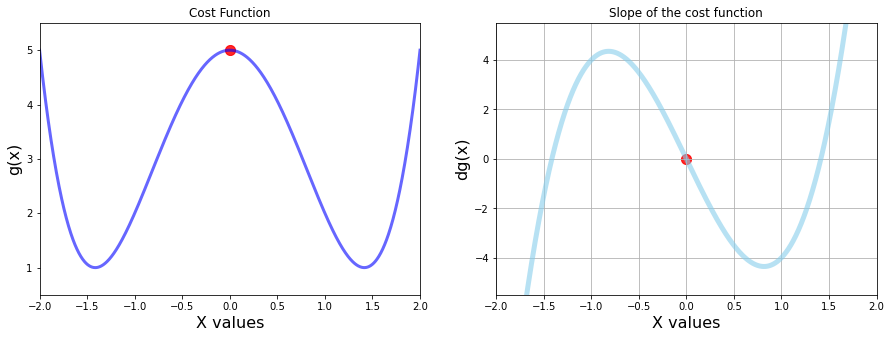

In [51]:
local_min, list_x, deriv_list = gradient_descent(dg, 0)

plt.figure(figsize=(15, 5))

# 1 charts: Cost function
plt.subplot(1, 2, 1)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.6)
plt.title('Cost Function')
plt.xlabel('X values', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 charts: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function')
plt.xlabel('X values', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.xlim(-2, 2)
plt.ylim(-5.5, 5.5)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, np.array(deriv_list), color='red', s=100, alpha=0.6)
plt.grid()

plt.show()